In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [19]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv')

In [22]:
df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,0,37.66667,4.5200,0.033270,124.983300,1,0,3,54,1,12
1,1,0,33.25000,2.4200,0.005217,9.854167,0,0,3,34,1,13
2,1,0,33.66667,4.5000,0.004156,15.000000,1,0,4,58,1,5
3,1,0,30.50000,2.5400,0.065214,137.869200,0,0,0,25,1,7
4,1,0,32.16667,9.7867,0.067051,546.503300,1,0,2,64,1,5


In [21]:
df.card = (df.card == 'yes').astype(int)
df.owner = (df.owner == 'yes').astype(int)
df.selfemp = (df.selfemp == 'yes').astype(int)

In [23]:
df.card.value_counts()

1    1023
0     296
Name: card, dtype: int64

In [24]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.card.values
y_val = df_val.card.values
y_test = df_test.card.values

del df_train['card']
del df_val['card']
del df_test['card']

In [25]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [31]:
# Question 1
print(roc_auc_score(y_train, df_train.reports))
print(roc_auc_score(y_train, df_train.dependents))
print(roc_auc_score(y_train, df_train.active))
print(roc_auc_score(y_train, df_train.share))

0.28333701393106236
0.46722427722262094
0.6043173411362006
0.989183643423692


In [106]:
df_train.head()

,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,3,40.50000,4.0128,0.000299,0.00000,0,0,1,12,1,17
1,1,32.33333,6.0000,0.000200,0.00000,1,0,4,18,1,4
2,1,29.16667,2.2000,0.038205,69.79333,0,0,0,49,1,7
3,1,54.66667,7.2900,0.106536,647.20670,1,0,2,78,1,9
4,0,25.00000,3.3984,0.000353,0.00000,1,0,2,29,0,4


In [41]:
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [107]:
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
card_decision = (y_pred >= 0.5)
(y_val == card_decision).mean()

0.9696969696969697

In [114]:
# Question 2
roc_auc_score(y_val, y_pred)

0.9949923991773226

In [53]:
from sklearn.metrics import precision_score, recall_score

In [116]:
precision_score(y_val, card_decision)

0.9951219512195122

In [119]:
thresholds = np.linspace(0, 1, 101)

precision_scores = []
recall_scores = []

for t in thresholds:
    precision = precision_score(y_val, card_decision)
    recall = recall_score(y_val, card_decision)
    print('%.2f %.3f %.3f' % (t, precision, recall))
    
    precision_scores.append(precision)
    recall_scores.append(recall)
    

0.00 0.995 0.967
0.01 0.995 0.967
0.02 0.995 0.967
0.03 0.995 0.967
0.04 0.995 0.967
0.05 0.995 0.967
0.06 0.995 0.967
0.07 0.995 0.967
0.08 0.995 0.967
0.09 0.995 0.967
0.10 0.995 0.967
0.11 0.995 0.967
0.12 0.995 0.967
0.13 0.995 0.967
0.14 0.995 0.967
0.15 0.995 0.967
0.16 0.995 0.967
0.17 0.995 0.967
0.18 0.995 0.967
0.19 0.995 0.967
0.20 0.995 0.967
0.21 0.995 0.967
0.22 0.995 0.967
0.23 0.995 0.967
0.24 0.995 0.967
0.25 0.995 0.967
0.26 0.995 0.967
0.27 0.995 0.967
0.28 0.995 0.967
0.29 0.995 0.967
0.30 0.995 0.967
0.31 0.995 0.967
0.32 0.995 0.967
0.33 0.995 0.967
0.34 0.995 0.967
0.35 0.995 0.967
0.36 0.995 0.967
0.37 0.995 0.967
0.38 0.995 0.967
0.39 0.995 0.967
0.40 0.995 0.967
0.41 0.995 0.967
0.42 0.995 0.967
0.43 0.995 0.967
0.44 0.995 0.967
0.45 0.995 0.967
0.46 0.995 0.967
0.47 0.995 0.967
0.48 0.995 0.967
0.49 0.995 0.967
0.50 0.995 0.967
0.51 0.995 0.967
0.52 0.995 0.967
0.53 0.995 0.967
0.54 0.995 0.967
0.55 0.995 0.967
0.56 0.995 0.967
0.57 0.995 0.967
0.58 0.995 0.9

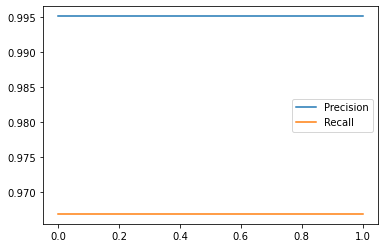

In [120]:
plt.plot(thresholds, precision_scores, label='Precision')
plt.plot(thresholds, recall_scores, label='Recall')
plt.legend()